# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Importing Dataset

In [2]:
dataset= pd.read_csv(r'C:\Users\DELL\Desktop\restaurant reviews.csv')

In [3]:
dataset.shape

(1000, 1)

In [4]:
dataset.head()

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...


# Data Cleaning

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [34]:
def ReviewCleaning(Review):
    review= re.sub('[^a-zA-Z]',' ',Review)
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review= ' '.join(review)
    return review

In [35]:
dataset['cleanedReviews']=dataset['Review'].apply(ReviewCleaning)
dataset.head()

,Review,cleanedReviews,tPolarity,tSubjectivity,Segmentation
0,Wow... Loved this place.,wow love place,0.3,0.80,positive
1,Crust is not good.,crust not good,0.7,0.60,positive
2,Not tasty and the texture was just nasty.,not tasti textur nasti,0.0,0.00,neutral
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...,0.1,0.60,positive
4,The selection on the menu was great and so wer...,select menu great price,0.8,0.75,positive


# Calculating Subjectivity & Polarity Using TextBlob

In [36]:
from textblob import TextBlob
from wordcloud import WordCloud

In [37]:
def calPolarity(Review):
    return TextBlob(Review).sentiment.polarity

def calSubjectivity(Review):
    return TextBlob(Review).sentiment.subjectivity

def Segmentation(Review):
    if Review > 0:
        return "positive"
    if Review == 0:
        return "neutral"
    else:
        return"negative"

In [38]:
dataset['tPolarity']=dataset['cleanedReviews'].apply(calPolarity)
dataset['tSubjectivity']=dataset['cleanedReviews'].apply(calSubjectivity)
dataset['Segmentation']=dataset['tPolarity'].apply(Segmentation)
dataset.head()

,Review,cleanedReviews,tPolarity,tSubjectivity,Segmentation
0,Wow... Loved this place.,wow love place,0.30,0.80,positive
1,Crust is not good.,crust not good,-0.35,0.60,negative
2,Not tasty and the texture was just nasty.,not tasti textur nasti,0.00,0.00,neutral
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...,0.10,0.60,positive
4,The selection on the menu was great and so wer...,select menu great price,0.80,0.75,positive


# Analysis and Visualization

In [41]:
dataset.pivot_table(index=['Segmentation'], aggfunc={'Segmentation':'count'})

,Segmentation
Segmentation,
negative,164
neutral,457
positive,379


<Axes: xlabel='Segmentation', ylabel='count'>

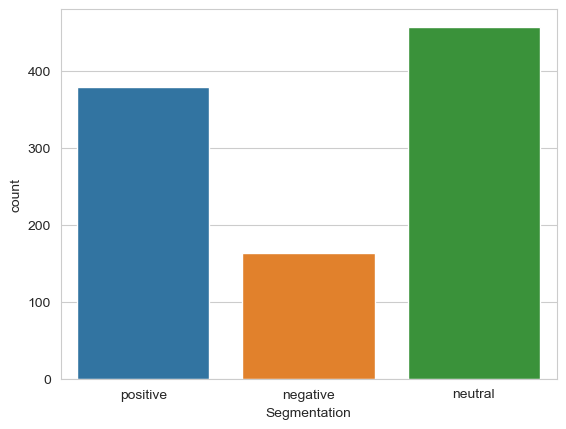

In [54]:
sns.countplot(data=dataset, x='Segmentation')

In [44]:
# Top 3 Most Positive

In [42]:
dataset.sort_values(by=['tPolarity'], ascending=False).head(3)

,Review,cleanedReviews,tPolarity,tSubjectivity,Segmentation
752,"Level 5 spicy was perfect, where spice didn't ...",level spici perfect spice whelm soup,1.0,1.0,positive
195,The best place to go for a tasty bowl of Pho!,best place go tasti bowl pho,1.0,0.3,positive
361,This is an Outstanding little restaurant with ...,outstand littl restaur best food ever tast,1.0,0.3,positive


In [43]:
# Top 3 Most Negative

In [45]:
dataset.sort_values(by=['tPolarity'], ascending=True).head(3)

,Review,cleanedReviews,tPolarity,tSubjectivity,Segmentation
848,"To my disbelief, each dish qualified as the wo...",disbelief dish qualifi worst version food ever...,-1.0,1.0,negative
29,The worst was the salmon sashimi.,worst salmon sashimi,-1.0,1.0,negative
538,Worst martini ever!,worst martini ever,-1.0,1.0,negative


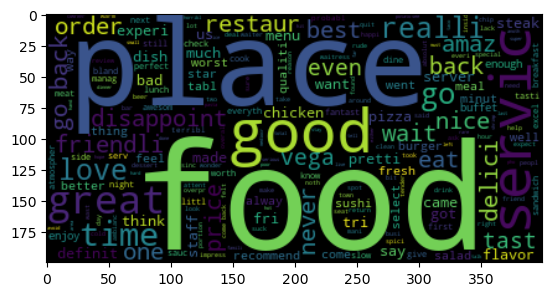

In [49]:
import matplotlib.pyplot as plt
consolidated=' '.join(Review for Review in dataset['cleanedReviews'])
wordCloud=WordCloud(width=400, height= 200, random_state=20, max_font_size=119).generate(consolidated)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis=('off')
plt.show()

In [52]:
import seaborn as sns

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

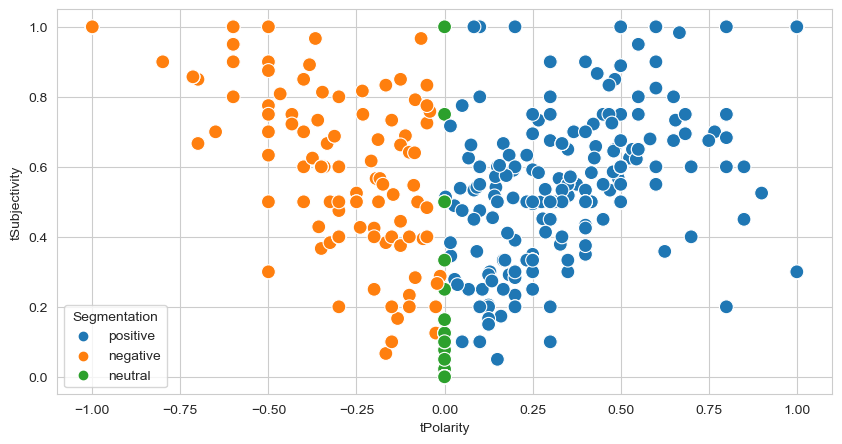

In [53]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.scatterplot(data=dataset, x='tPolarity', y='tSubjectivity', s=100, hue='Segmentation')